# **Data Bootcamp Final Project**
## **Dogecoin Analysis and Price Prediction**
*   Yu-Ting Chien (ytc354)
*   Yu-Jui Chen (yjc464)


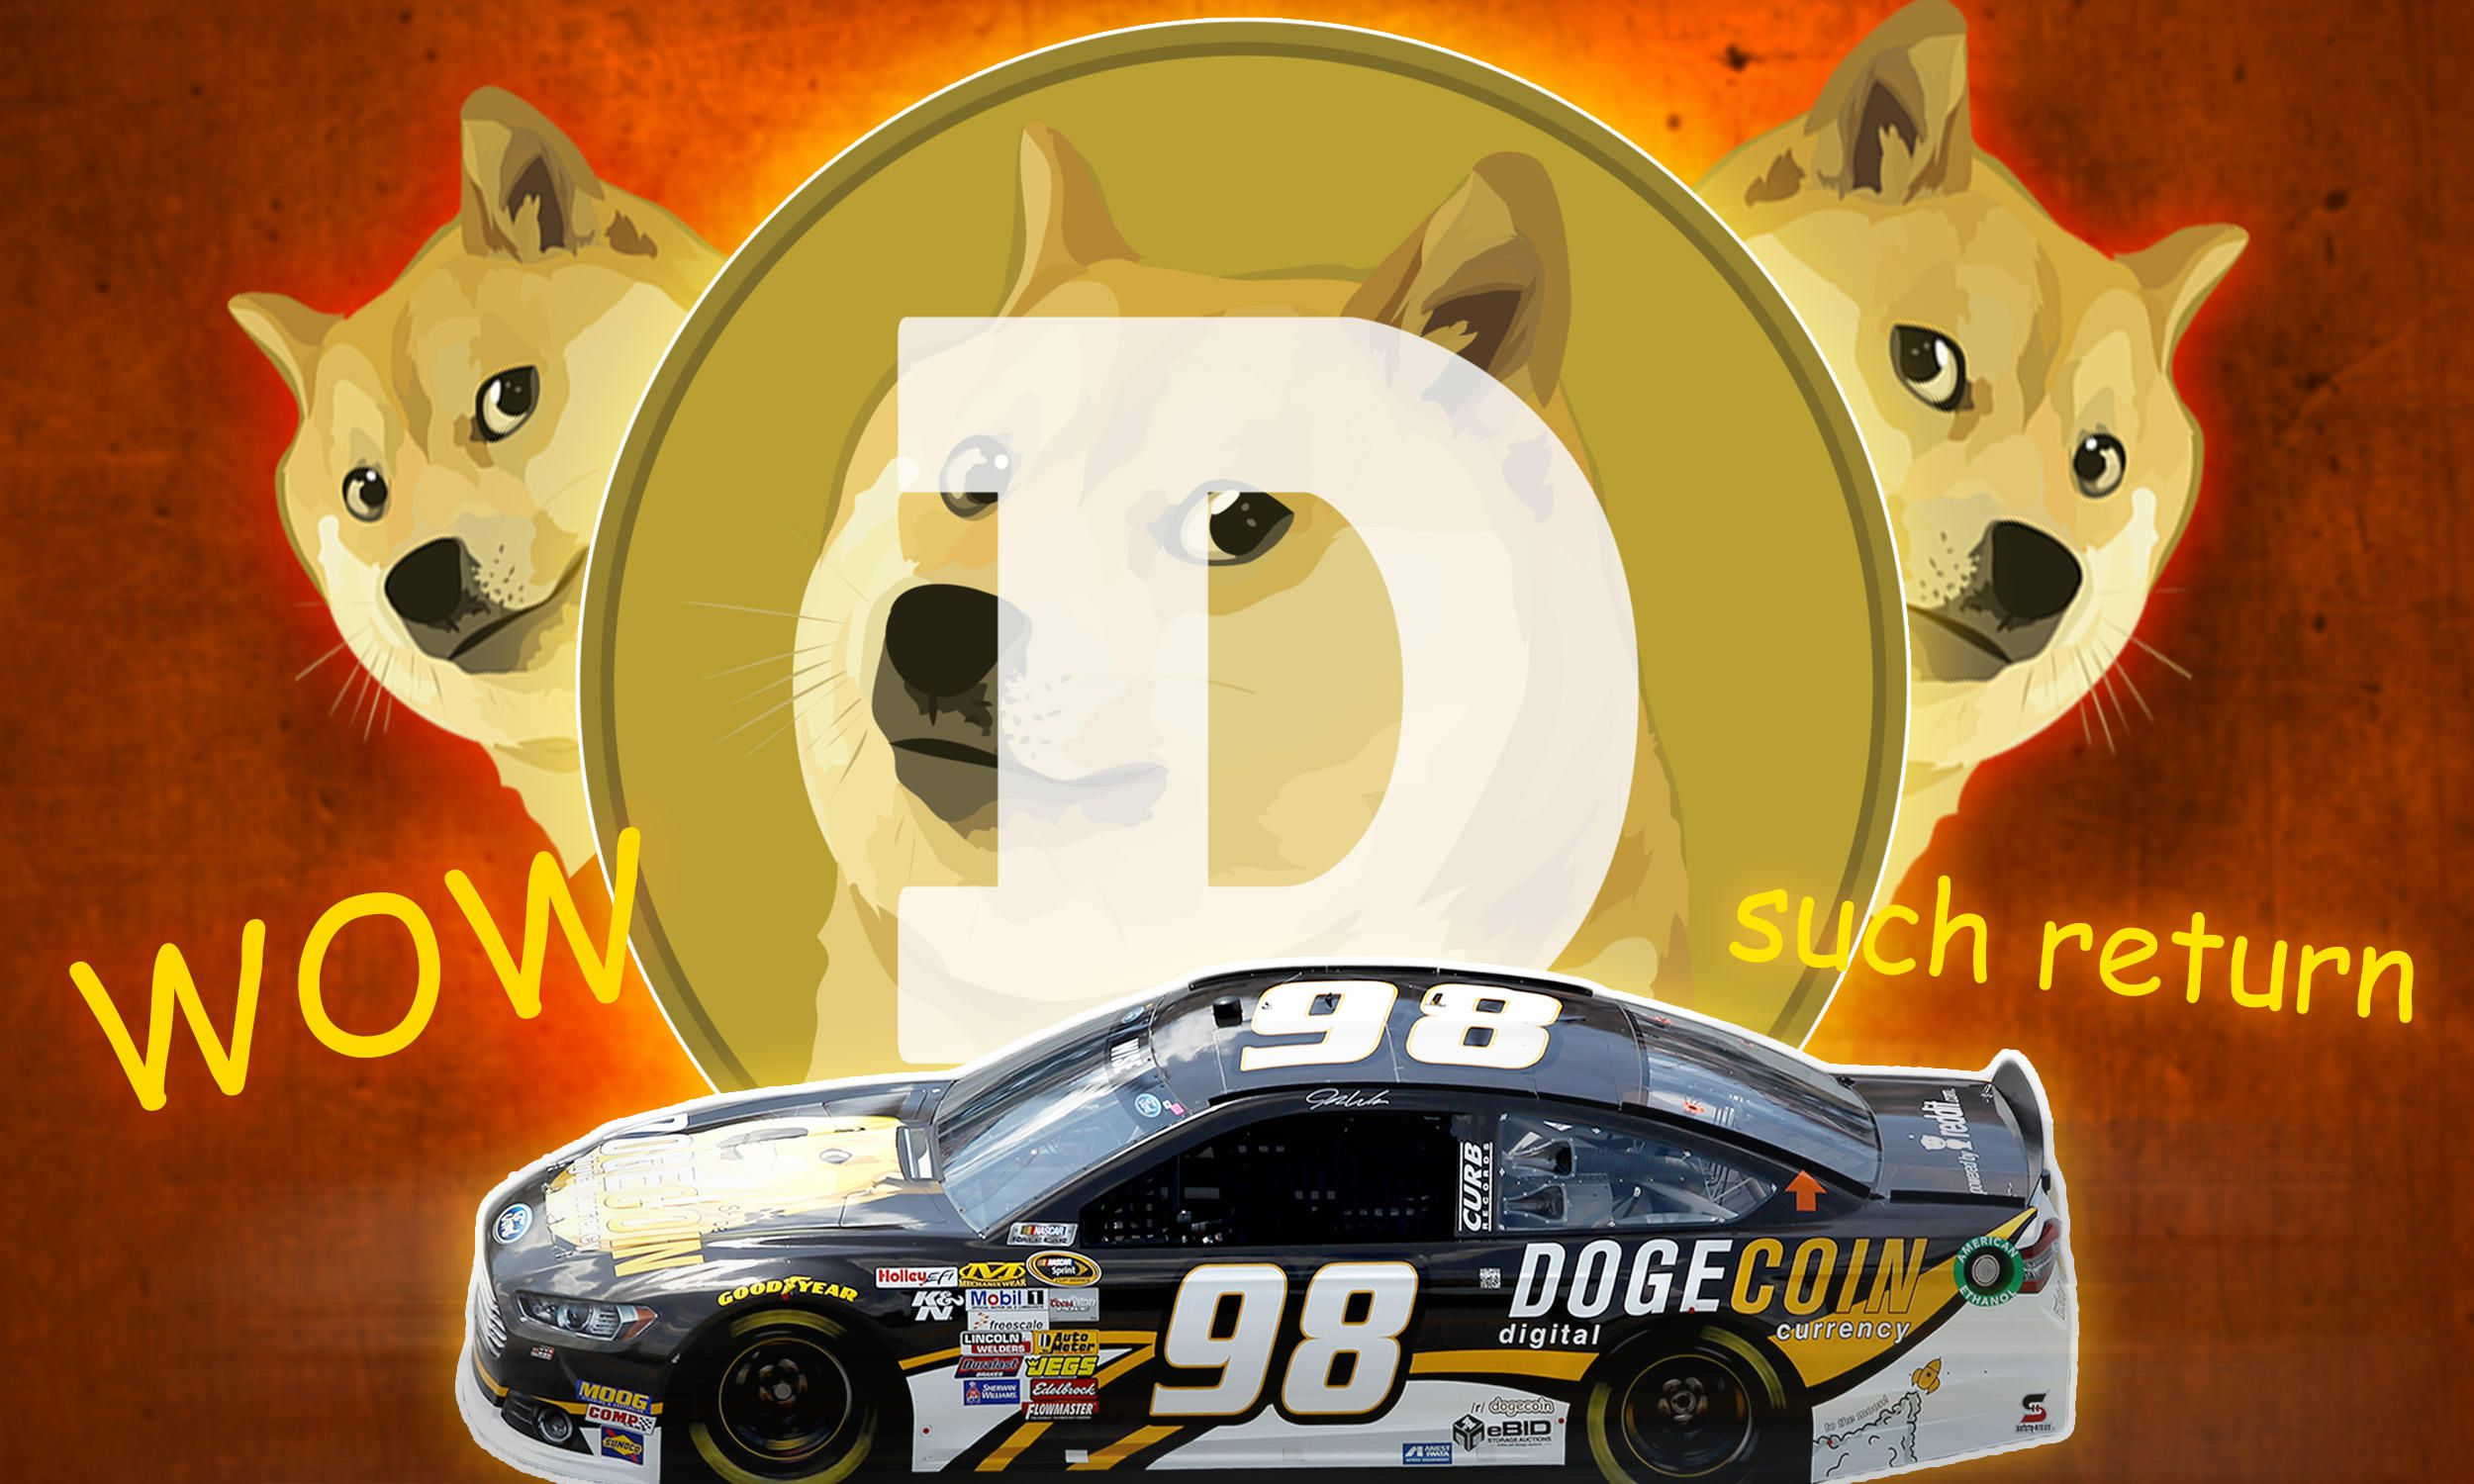

## **Introduction**

The crypto bull run of 2020 was very different from that of 2017. While the earlier rally had largely been driven by individual investors and whales, the 2020 surge was due to rising institutional interest in digital currencies.
This has given us hope that cryptocurrencies might finally receive the mainstream acceptance that they have sought for so long, which in turn could drive mass adoption.

For some reason, we are interested in Dogecoin, which was a meme before. However, it becomes to be the fourth-largest cryptocurrency now.

**"Will the Dogecoin go to $1?"**
 
**"Is it worth buying it?"** 

*Originally formed as a joke, Dogecoin was created by IBM software engineer Billy Markus and Adobe software engineer Jackson Palmer. Dogecoin is an open source peer-to-peer digital currency, favored by Shiba Inus worldwide.*

# Import Libraries

In [1]:
# libraries
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import re
import string

# visualisation
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns

# EDA
from collections import Counter
import pandas_profiling as pp

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import Markdown, display
import json
from collections import OrderedDict

import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
from functools import partial

# Facebook Prophet packages:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

# Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime
from datetime import date, datetime, time

from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
url2 = 'https://raw.githubusercontent.com/Raven312/Dogecoin-Analysis-and-Price-Prediction/main/TweetsElonMusk.csv'
tweets = pd.read_csv(url2)
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,@vincent13031925 For now. Costs are decreasing...,en,[],[],[],640,444,15281,[],[],https://twitter.com/elonmusk/status/1381273474...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,Love this beautiful shot,en,[],[],[],2464,1517,71161,[],[],https://twitter.com/elonmusk/status/1381273076...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,en,[],[],[],115,48,1380,[],[],https://twitter.com/elonmusk/status/1381258144...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,The art In Cyberpunk is incredible,en,[],[],[],8437,10329,228144,[],[],https://twitter.com/elonmusk/status/1381221447...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,@itsALLrisky 🤣🤣,und,[],[],[],446,542,7489,[],[],https://twitter.com/elonmusk/status/1381129584...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN


In [3]:
url = 'https://raw.githubusercontent.com/Raven312/Dogecoin-Analysis-and-Price-Prediction/main/DOGE-USD.csv'
data = pd.read_csv(url)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [4]:
# Also check the latest data. These values seem to make sense as compared to the actual prices in May this year
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2427,2021-05-10,0.569687,0.569687,0.421291,0.449964,0.449964,1.651452e+10
2428,2021-05-11,0.450488,0.546651,0.445034,0.495231,0.495231,1.456698e+10
2429,2021-05-12,0.493742,0.519975,0.385376,0.385376,0.385376,8.621338e+09
2430,2021-05-13,0.392176,0.519461,0.357175,0.490374,0.490374,1.866317e+10
2431,2021-05-14,0.494861,0.524046,0.467698,0.509555,0.509555,1.845391e+10


# Data Wrangling

In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2.428000e+03
mean,0.008373,0.009355,0.007574,0.008572,0.008572,3.977566e+08
std,0.045994,0.052641,0.040067,0.047117,0.047117,2.890628e+09
min,0.000087,0.000089,0.000085,0.000087,0.000087,1.669500e+04
25%,0.000225,0.000229,0.000221,0.000225,0.000225,2.303138e+05
50%,0.002061,0.002100,0.002021,0.002064,0.002064,9.247995e+06
75%,0.002983,0.003088,0.002865,0.002987,0.002987,5.287818e+07
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [7]:
data = data.set_index('Date')
data = data.drop(columns = ['Adj Close'])

## Data Cleaning

In [8]:
# Let's check if there is any missing data.
data.isna().sum()

Open      4
High      4
Low       4
Close     4
Volume    4
dtype: int64

In [9]:
nodata = data[pd.isnull(data).any(axis = 1)]
nodata

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN


few dates are missing all info

In [10]:
# Let's drop the NaN value
data.dropna(axis = 0, inplace = True)

# Data Analysis

## Distrubution of 'Open', 'High', 'Low', 'Close' Values

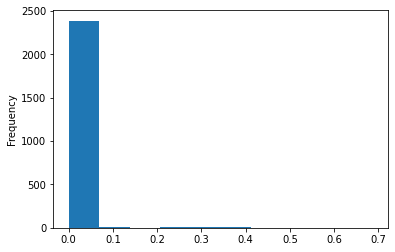

In [11]:
data['Open'].plot(kind = 'hist')

In [12]:
def distribution_plot(x, title, c):
    fig, ax = plt.subplots(2, 1, figsize = (15,10), sharex = True)
    sns.distplot(x, ax = ax[0], color = c)
    ax[0].set(xlabel = None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax = ax[1], color = c)
    ax[1].set(xlabel = None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize = 20)
    plt.tight_layout(pad = 4.0)
    plt.show()

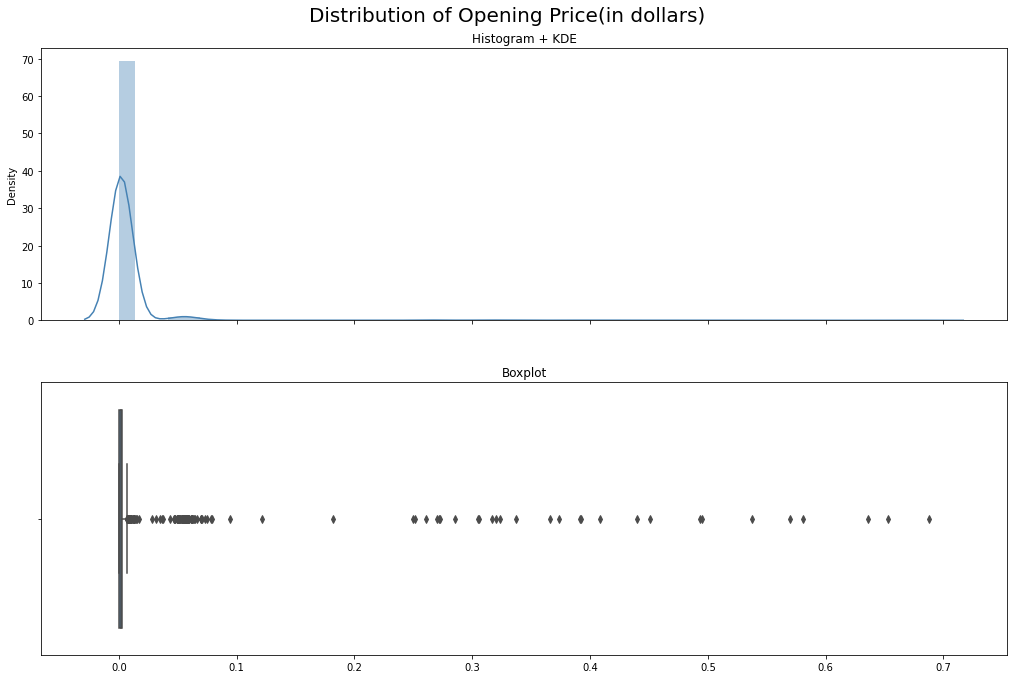

In [13]:
distribution_plot(data['Open'],'Distribution of Opening Price(in dollars)','steelblue')

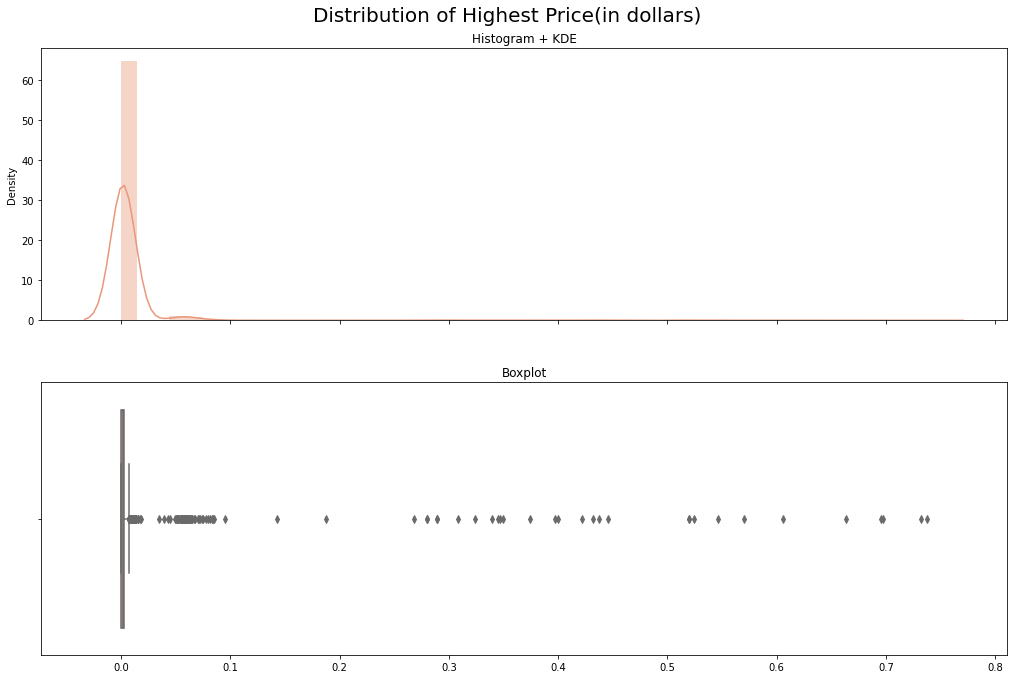

In [14]:
distribution_plot(data['High'],'Distribution of Highest Price(in dollars)','darksalmon')

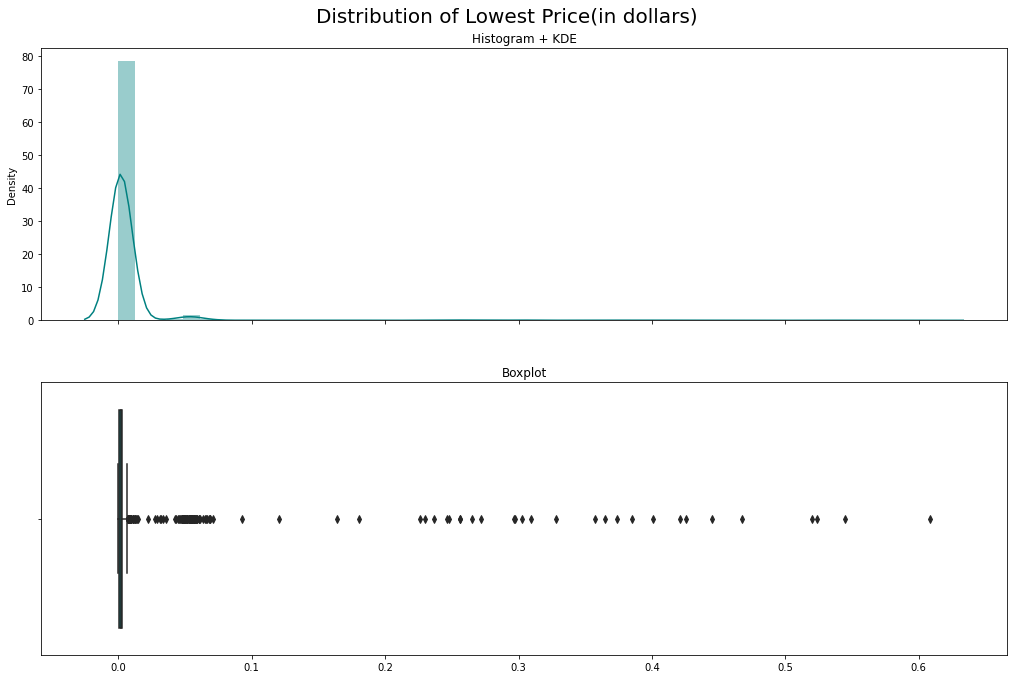

In [15]:
distribution_plot(data['Low'],'Distribution of Lowest Price(in dollars)','teal')

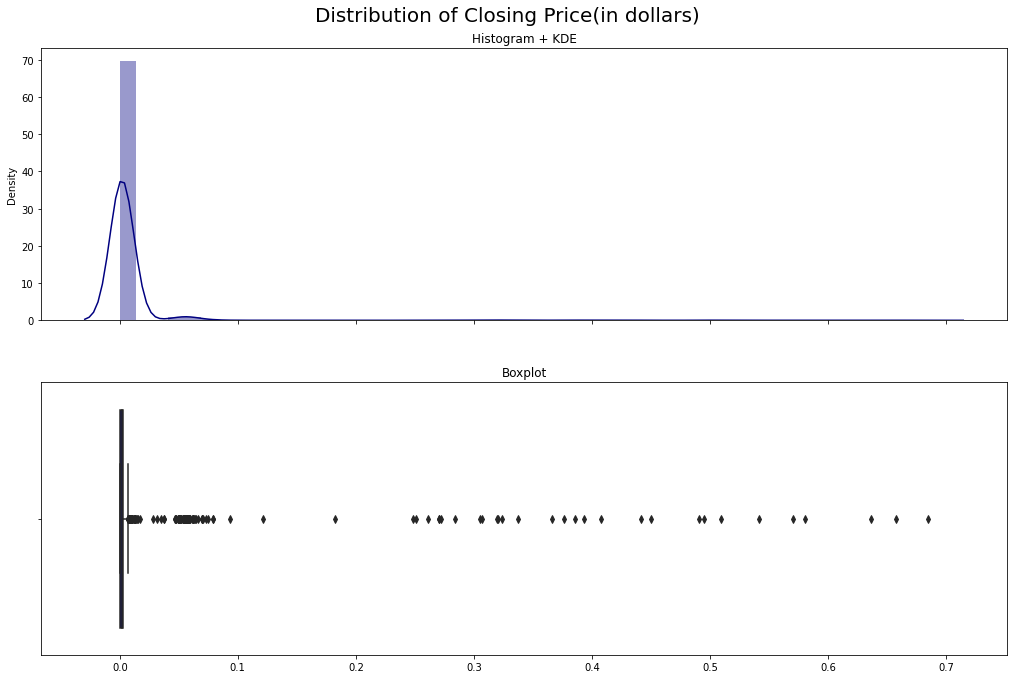

In [16]:
distribution_plot(data['Close'],'Distribution of Closing Price(in dollars)','navy')

Text(0.5, 1.0, 'Dogecoin Value Distribution Without Outliers')

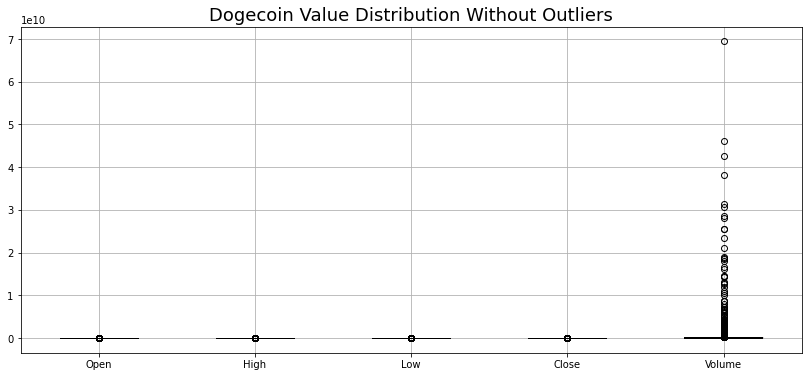

In [17]:
# See without outliers
data_nooutliers = data.boxplot(color = 'black', figsize = [14, 6], notch = True)
data_nooutliers.set_title('Dogecoin Value Distribution Without Outliers', fontsize = 18)

Text(0.5, 1.0, 'Bitcoin Price over time')

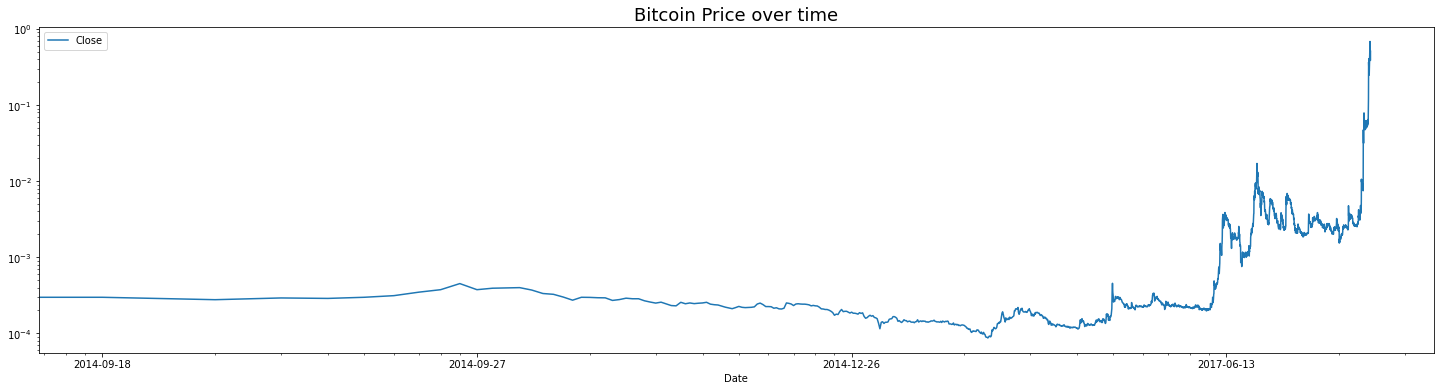

In [18]:
# Plot the time series price data
# Create a log-log plot of the closing prices for the past 7 years
data.plot(y = 'Close', logx = True, logy = True, figsize = [25, 6])
plt.title("Bitcoin Price over time", size = 18)

## Values at Open and Close

Text(0.5, 1.0, 'Dogecoin Open vs Close')

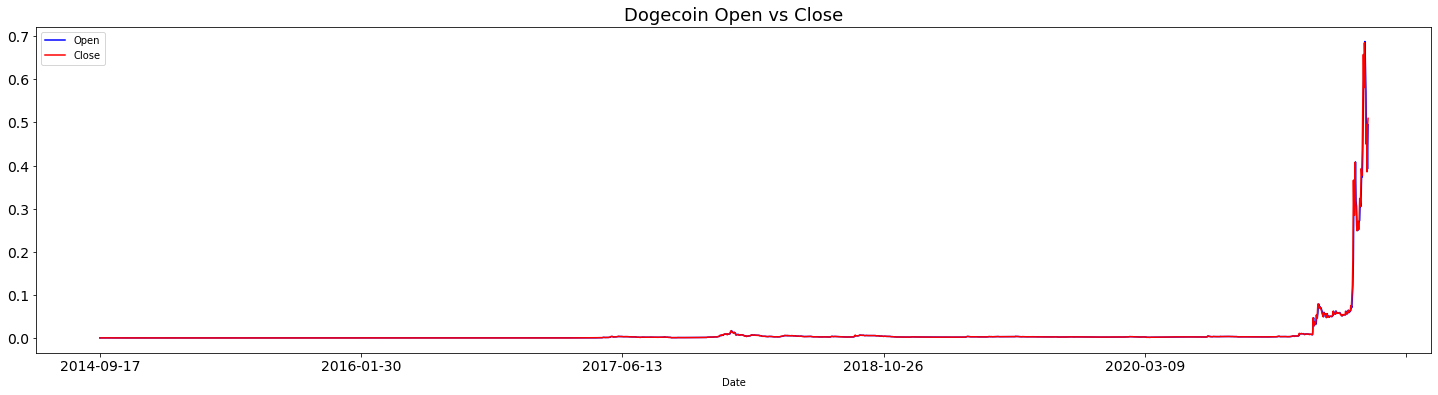

In [19]:
dogeoc = data[['Open', 'Close']]
dogeoc = dogeoc.plot(kind = 'line', color = ('blue', 'red'), figsize = [25, 6], fontsize = 14)
dogeoc.set_title('Dogecoin Open vs Close', fontsize = 18)

We can see that there is no perceptable difference between open and closing values

## Daily Change of Coin Values

In [20]:
doge2 = data
doge2['Daily_Change'] = data.Close - data.Open
doge2

,Open,High,Low,Close,Volume,Daily_Change
Date,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,1.463600e+06,-0.000025
2014-09-18,0.000268,0.000325,0.000267,0.000298,2.215910e+06,0.000030
2014-09-19,0.000298,0.000307,0.000275,0.000277,8.835630e+05,-0.000021
2014-09-20,0.000276,0.000310,0.000267,0.000292,9.930040e+05,0.000016
2014-09-21,0.000293,0.000299,0.000284,0.000288,5.391400e+05,-0.000005
...,...,...,...,...,...,...
2021-05-10,0.569687,0.569687,0.421291,0.449964,1.651452e+10,-0.119723
2021-05-11,0.450488,0.546651,0.445034,0.495231,1.456698e+10,0.044743
2021-05-12,0.493742,0.519975,0.385376,0.385376,8.621338e+09,-0.108366


Text(0.5, 1.0, 'Daily Change in Dogecoin Values')

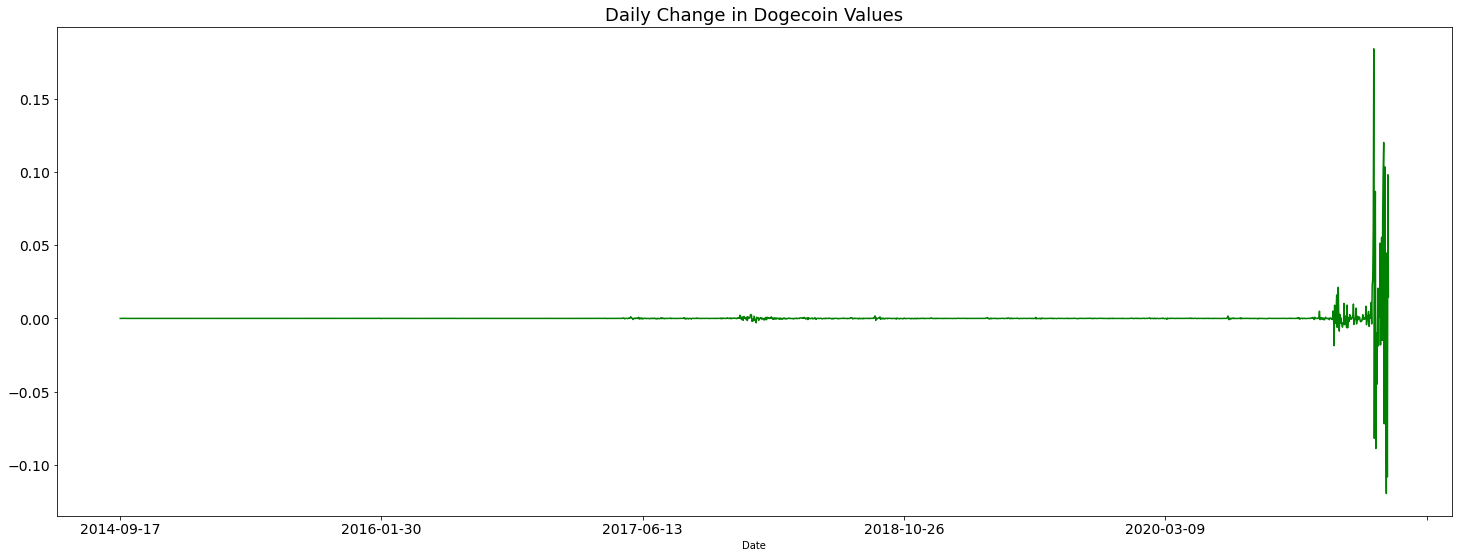

In [21]:
d2dc = doge2.Daily_Change.plot(kind = 'line', color = 'green', figsize = [25, 9], fontsize = 14)
d2dc.set_title('Daily Change in Dogecoin Values', fontsize = 18)

There is an interesting fact about the amount of volatility around the start of 2018, and a pretty extreme amount from late 2020 onwards.

## Dogecoin High vs. Low

Text(0.5, 1.0, 'Dogecoin High vs Low')

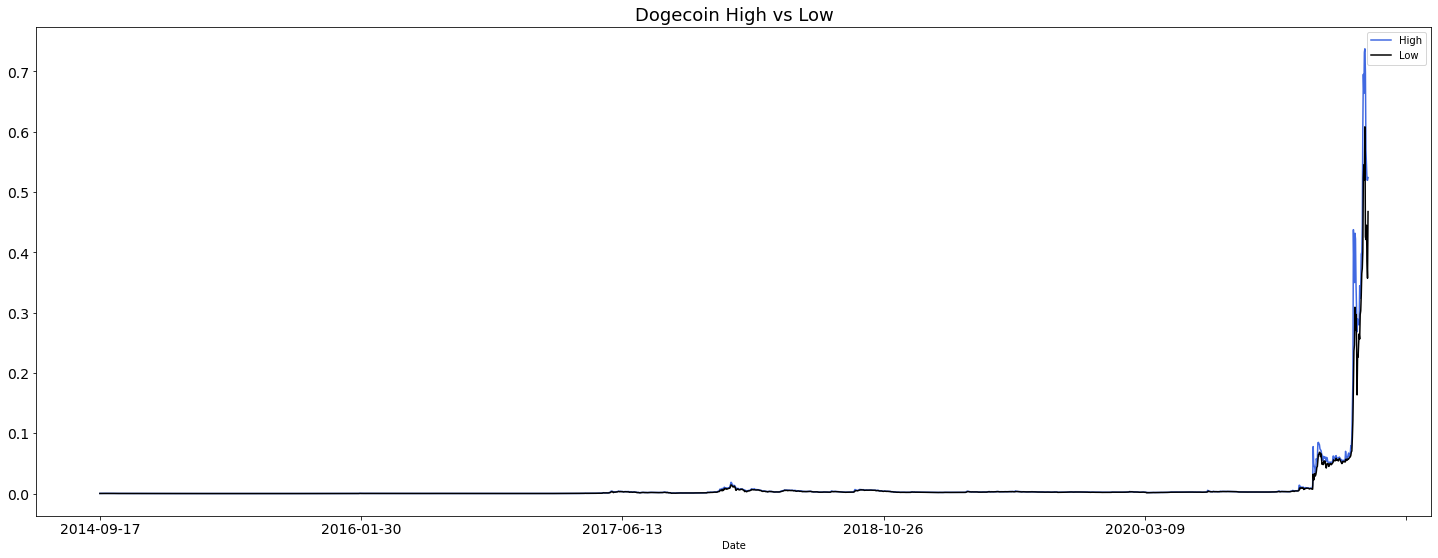

In [22]:
dogehl = data[['High', 'Low']]
dogehl = dogehl.plot(kind='line',color = ('royalblue', 'black'), figsize = [25, 9], fontsize = 14)
dogehl.set_title('Dogecoin High vs Low', fontsize = 18)

In [23]:
# Daily range
doge2['Daily_Range'] = doge2.High - doge2.Low
doge2

,Open,High,Low,Close,Volume,Daily_Change,Daily_Range
Date,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,1.463600e+06,-0.000025,0.000039
2014-09-18,0.000268,0.000325,0.000267,0.000298,2.215910e+06,0.000030,0.000058
2014-09-19,0.000298,0.000307,0.000275,0.000277,8.835630e+05,-0.000021,0.000032
2014-09-20,0.000276,0.000310,0.000267,0.000292,9.930040e+05,0.000016,0.000043
2014-09-21,0.000293,0.000299,0.000284,0.000288,5.391400e+05,-0.000005,0.000015
...,...,...,...,...,...,...,...
2021-05-10,0.569687,0.569687,0.421291,0.449964,1.651452e+10,-0.119723,0.148396
2021-05-11,0.450488,0.546651,0.445034,0.495231,1.456698e+10,0.044743,0.101617
2021-05-12,0.493742,0.519975,0.385376,0.385376,8.621338e+09,-0.108366,0.134599


Text(0.5, 1.0, 'Daily Range of Dogecoin')

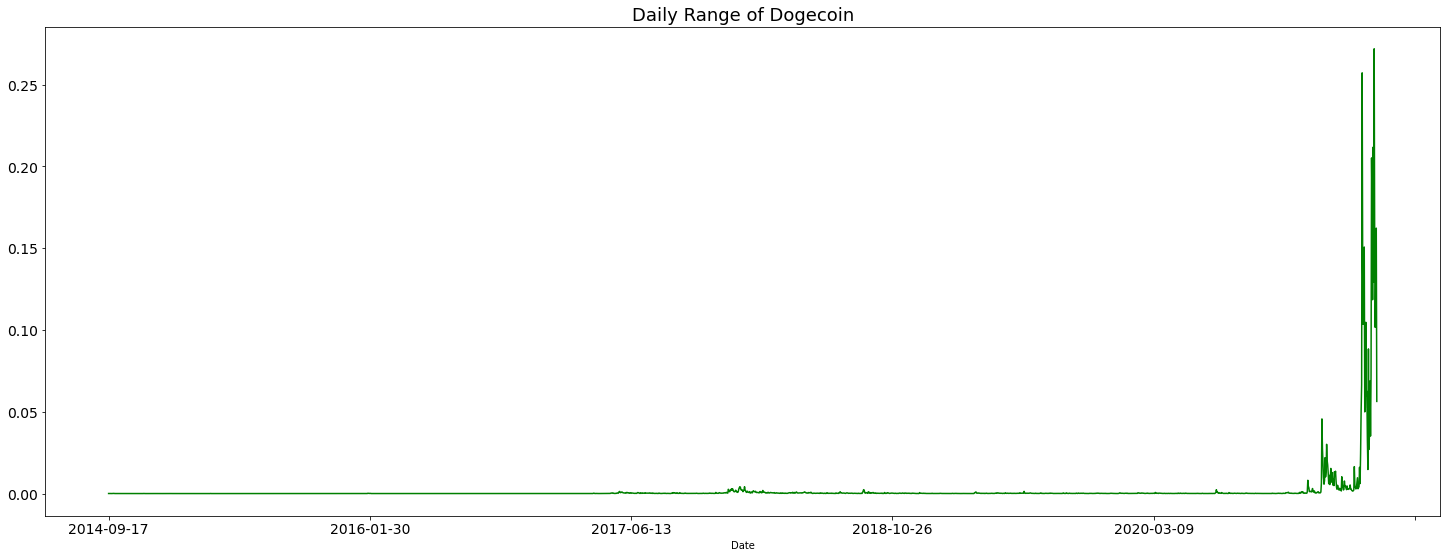

In [24]:
d2dr = doge2.Daily_Range.plot(kind = 'line', color = 'green', figsize = [25, 9], fontsize = 14)
d2dr.set_title('Daily Range of Dogecoin', fontsize = 18)

## Daily Volume of Dogecoin Transactions

Text(0.5, 1.0, 'Daily Volume of Dogecoin Transactions (in 10s of Billions)')

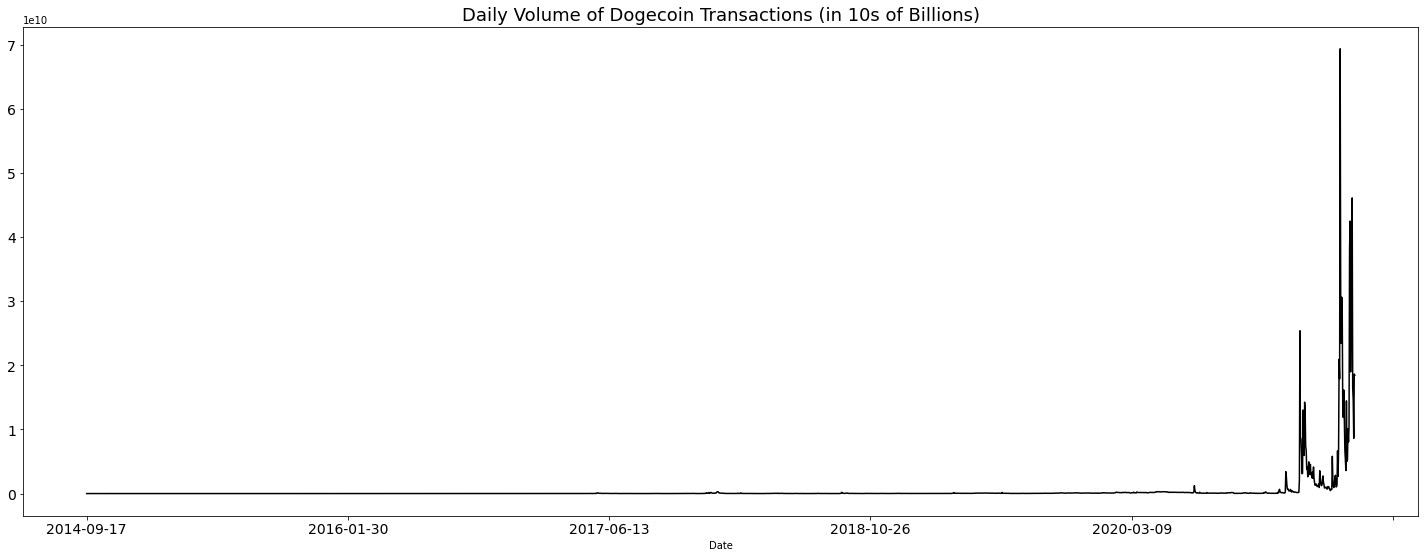

In [25]:
d2v = doge2.Volume.plot(kind = 'line', color = 'black', figsize = [25, 9], fontsize = 14)
d2v.set_title('Daily Volume of Dogecoin Transactions (in 10s of Billions)', fontsize = 18)

The daily Volume of Dogecoin Transactions has increase amount recently.

In [26]:
# amount of money taking place in Dogecoin transactions in a day.
doge2['Average'] = ((doge2.Open + doge2.Close + doge2.High + doge2.Low) / 4)
doge2['Impact'] =  doge2.Average * doge2.Volume
doge2

,Open,High,Low,Close,Volume,Daily_Change,Daily_Range,Average,Impact
Date,,,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,1.463600e+06,-0.000025,0.000039,0.000280,4.098080e+02
2014-09-18,0.000268,0.000325,0.000267,0.000298,2.215910e+06,0.000030,0.000058,0.000289,6.415059e+02
2014-09-19,0.000298,0.000307,0.000275,0.000277,8.835630e+05,-0.000021,0.000032,0.000289,2.555706e+02
2014-09-20,0.000276,0.000310,0.000267,0.000292,9.930040e+05,0.000016,0.000043,0.000286,2.842474e+02
2014-09-21,0.000293,0.000299,0.000284,0.000288,5.391400e+05,-0.000005,0.000015,0.000291,1.568897e+02
...,...,...,...,...,...,...,...,...,...
2021-05-10,0.569687,0.569687,0.421291,0.449964,1.651452e+10,-0.119723,0.148396,0.502657,8.301144e+09
2021-05-11,0.450488,0.546651,0.445034,0.495231,1.456698e+10,0.044743,0.101617,0.484351,7.055529e+09
2021-05-12,0.493742,0.519975,0.385376,0.385376,8.621338e+09,-0.108366,0.134599,0.446117,3.846128e+09


Text(0.5, 1.0, 'Daily Impact of Dogecoin Transactions, in Billions')

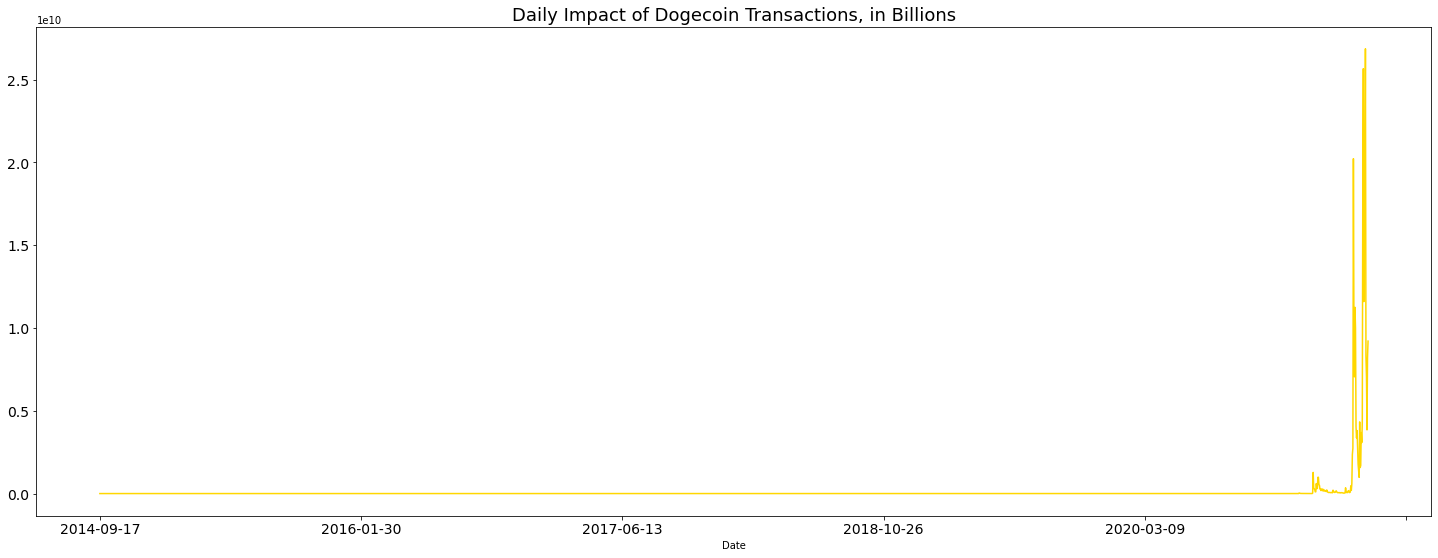

In [27]:
d2i = doge2.Impact.plot(kind = 'line', color = 'gold', figsize = [25, 9], fontsize = 14)
d2i.set_title('Daily Impact of Dogecoin Transactions, in Billions', fontsize = 18)

We can see over 7 billion transactions in a single day, for a total value of money being exchanged at over 2.5 billion dollars.

## Dates of Observation

In [28]:
print("Highest Daily Close:", doge2.Close.max())
print("Highest Daily Price:", doge2.High.max())
print("Highest Daily Average:", doge2.Average.max())
print("Highest Daily Volume Traded:", doge2.Volume.max())
print("Highest Daily Sum of Transactions:", doge2.Impact.max())

Highest Daily Close: 0.6847770000000001
Highest Daily Price: 0.737567
Highest Daily Average: 0.66749375
Highest Daily Volume Traded: 69410680685.0
Highest Daily Sum of Transactions: 26866436850.110023


In [29]:
print('5 Highest Closing Days:', doge2.Close.sort_values(ascending = False).head(5))
print('----------')
print('5 Days with Highest Price:', doge2.High.sort_values(ascending = False).head(5))
print('----------')
print('5 Highest Average Days:', doge2.Average.sort_values(ascending = False).head(5))
print('----------')
print('5 Days with Highest Volume:', doge2.Volume.sort_values(ascending = False).head(5))
print('----------')
print('5 Highest Value of Dogecoin Traded Days:', doge2.Impact.sort_values(ascending = False).head(5))

5 Highest Closing Days: Date
2021-05-07    0.684777
2021-05-05    0.657633
2021-05-08    0.636439
2021-05-06    0.580804
2021-05-09    0.570070
Name: Close, dtype: float64
----------
5 Days with Highest Price: Date
2021-05-08    0.737567
2021-05-07    0.731972
2021-05-09    0.697625
2021-05-05    0.695262
2021-05-06    0.663616
Name: High, dtype: float64
----------
5 Highest Average Days: Date
2021-05-08    0.667494
2021-05-07    0.629508
2021-05-06    0.610591
2021-05-05    0.603518
2021-05-09    0.582305
Name: Average, dtype: float64
----------
5 Days with Highest Volume: Date
2021-04-16    6.941068e+10
2021-05-09    4.613806e+10
2021-05-05    4.252510e+10
2021-05-04    3.823813e+10
2021-04-17    3.141340e+10
Name: Volume, dtype: float64
----------
5 Highest Value of Dogecoin Traded Days: Date
2021-05-09    2.686644e+10
2021-05-05    2.566466e+10
2021-04-16    2.022705e+10
2021-05-04    1.900823e+10
2021-05-07    1.801343e+10
Name: Impact, dtype: float64


In [30]:
print('1 Highest Value Dogecoin =', doge2.High.max()/doge2.Open[0], 'Dogecoins at First Open')

1 Highest Value Dogecoin = 2517.2935153583617 Dogecoins at First Open



# Close Price Prediction



**How will Dogecoin price change?**

**Dogecoin to the Moon?**

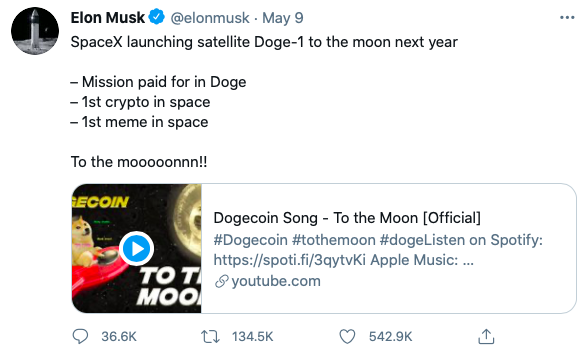

Model Introduction:

*   **LSTMs:** Are a special kind of RNN, capable of learning long-term dependencies.
*   **Random Forest:** A meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset. Uses averaging to improve the predictive accuracy and control over-fitting.

*   **Prophet:** Prophet is a procedure for forecasting time series data based on an additive model. Robust to missing data and shifts in the trend, and excellent in handling outliers.

### Time series Analysis and Prediction using LSTM


In [31]:
doge_predict = data[['Close']]

In [32]:
doge_predict.tail()

,Close
Date,
2021-05-10,0.449964
2021-05-11,0.495231
2021-05-12,0.385376
2021-05-13,0.490374
2021-05-14,0.509555


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range = (0,1))
doge_price = scaler.fit_transform(np.array(doge_predict))

In [34]:
doge_price

array([[2.64353211e-04],
       [3.08168660e-04],
       [2.77497846e-04],
       ...,
       [5.62720355e-01],
       [7.16071507e-01],
       [7.44085645e-01]])

In [35]:
# split data
train_size = int(len(doge_price) * 0.7)
test_size = len(doge_price) - train_size
train, test = doge_price[0:train_size,:], doge_price[train_size:len(doge_price),:]
print(len(train), len(test))

1699 729


In [36]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [37]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1698
728


In [38]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [39]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam')
history = model.fit(trainX, trainY, epochs = 300, batch_size = 100, validation_data = (testX, testY), verbose = 0, shuffle = False)

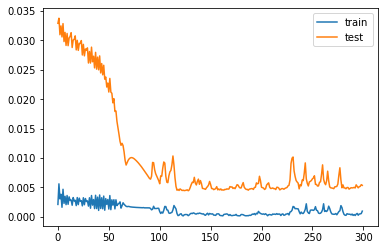

In [40]:
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'test')
pyplot.legend()
pyplot.show()

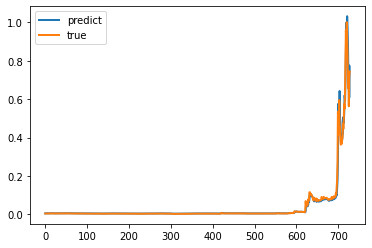

In [41]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict',linewidth = 2, markersize = 12)
pyplot.plot(testY, label='true',linewidth = 2, markersize = 12)
pyplot.legend()
pyplot.show()

In [42]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [43]:
print('r2_score:', r2_score(testY_inverse, yhat_inverse))
print('MSE:', mean_squared_error(testY_inverse, yhat_inverse))
print('MAE:', mean_absolute_error(testY_inverse, yhat_inverse))
lstm_r2_score = r2_score(testY_inverse, yhat_inverse)
lstm_mean_squared_error = mean_squared_error(testY_inverse, yhat_inverse)
lstm_mean_absolute_error = mean_absolute_error(testY_inverse, yhat_inverse)

r2_score: 0.9645285732317088
MSE: 0.0002485596033896672
MAE: 0.003668188655050778


### Time series Analysis and Prediction using Random Forest


In [44]:
new_df = pd.read_csv('https://raw.githubusercontent.com/Raven312/Dogecoin-Analysis-and-Price-Prediction/main/DOGE-USD.csv', usecols = ['Open','High','Low','Close','Volume']).fillna(method = 'ffill')

In [45]:
X = new_df.drop('Close', axis = 1)
y = new_df['Close']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2432, 4)
Shape of y =  (2432,)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1702, 4)
Shape of y_train =  (1702,)
Shape of X_test =  (730, 4)
Shape of y_test =  (730,)


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
regressor = RandomForestRegressor(n_estimators = 500, criterion = 'mse',random_state = 42 )
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [49]:
regressor.score(X_test, y_test)

0.9856590246015018

In [50]:
y_pred = regressor.predict(X_test)

In [51]:
ds = pd.DataFrame()
ds['Close'] = y_test

In [52]:
ds['Prediction'] = y_pred
ds.head(11)

,Close,Prediction
438,0.000130,0.000264
2121,0.004750,0.004884
611,0.000228,0.000264
1104,0.001141,0.000633
2111,0.002326,0.002385
1972,0.002986,0.003063
1462,0.005981,0.005785
1070,0.001716,0.001943
251,0.000161,0.000264
2319,0.008524,0.008308


In [53]:
print('r2_score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
rf_r2_score = r2_score(y_test, y_pred)
rf_mean_squared_error = mean_squared_error(y_test, y_pred)
rf_mean_absolute_error = mean_absolute_error(y_test, y_pred)

r2_score: 0.9856590246015018
MSE: 3.539639678666358e-05
MAE: 0.0007757819382988973


## Time series Analysis and Prediction using Prophet

In [54]:
# Renaming the column names accroding to Prophet's requirements
data.reset_index(inplace = True)
prophet_df=data[['Date','Close']]
prophet_df.rename(columns = {'Date':'ds','Close':'y'},inplace = True)

prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

future= prophet_basic.make_future_dataframe(periods = 360)
future.tail(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2786,2022-05-08
2787,2022-05-09


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


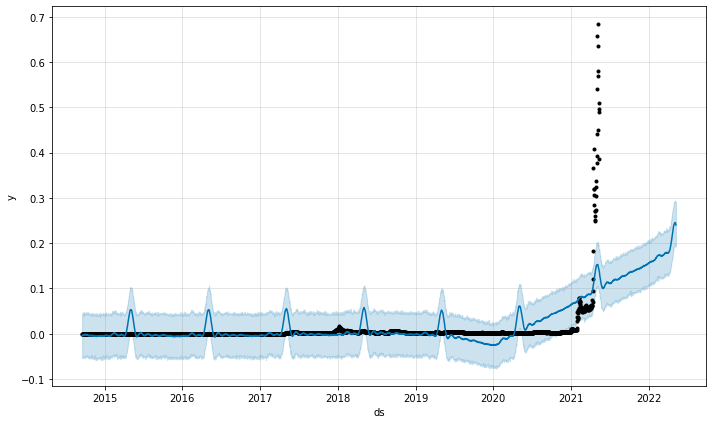

In [55]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

forecast = prophet_basic.predict(future)
fig1 = prophet_basic.plot(forecast)

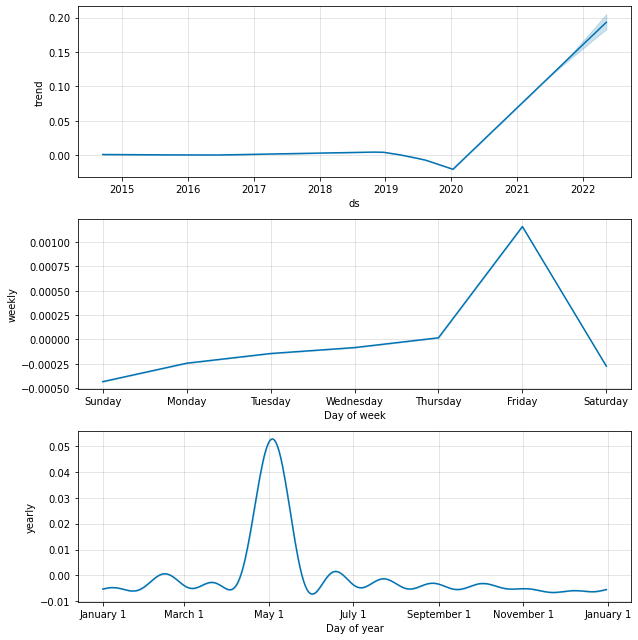

In [56]:
fig1 = prophet_basic.plot_components(forecast)

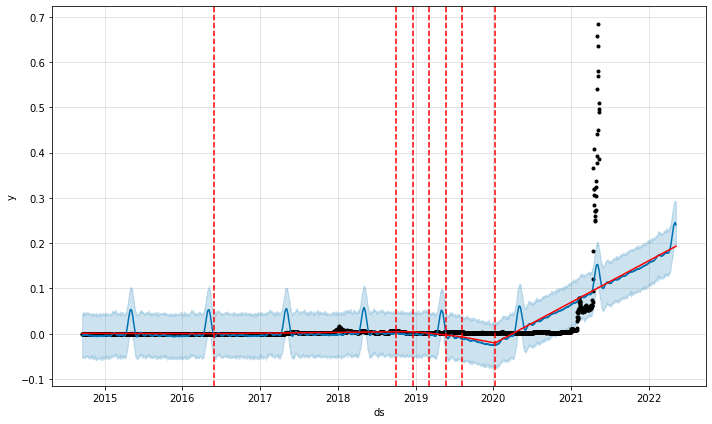

In [57]:
# Adding ChangePoints to prophet
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [58]:
prophet_df['Open'] = data['Open']
prophet_df['High'] = data['High']
prophet_df['Low'] = data['Low']
prophet_df['Vol'] = data['Volume']

prophet_df=prophet_df.dropna()
train_X= prophet_df[:1500]
test_X= prophet_df[1500:]

pro_regressor= Prophet()
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Vol')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


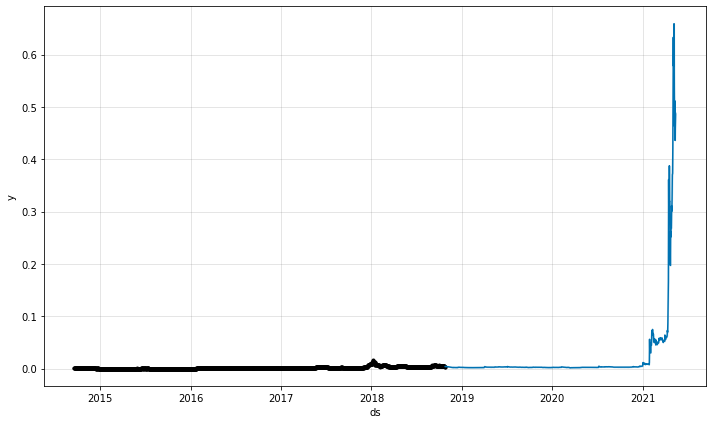

In [59]:
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods = 249)

#Forecast the data for Test data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

In [60]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,High,High_lower,High_upper,Low,Low_lower,Low_upper,Open,Open_lower,Open_upper,Vol,Vol_lower,Vol_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
923,2021-05-10,0.001511,0.462559,0.462842,0.001439,0.001584,0.448360,0.448360,0.448360,0.263436,0.263436,0.263436,-0.246081,-0.246081,-0.246081,-0.004530,-0.004530,-0.004530,0.461190,0.461190,0.461190,0.461185,0.461185,0.461185,-0.000006,-0.000006,-0.000006,0.000011,0.000011,0.000011,0.0,0.0,0.0,0.462701
924,2021-05-11,0.001511,0.511418,0.511714,0.001439,0.001584,0.430181,0.430181,0.430181,0.278331,0.278331,0.278331,-0.194462,-0.194462,-0.194462,-0.003996,-0.003996,-0.003996,0.510061,0.510061,0.510061,0.510055,0.510055,0.510055,-0.000003,-0.000003,-0.000003,0.000010,0.000010,0.000010,0.0,0.0,0.0,0.511572
925,2021-05-12,0.001511,0.435867,0.436155,0.001439,0.001584,0.409130,0.409130,0.409130,0.240906,0.240906,0.240906,-0.213193,-0.213193,-0.213193,-0.002364,-0.002364,-0.002364,0.434494,0.434494,0.434494,0.434480,0.434480,0.434480,0.000005,0.000005,0.000005,0.000009,0.000009,0.000009,0.0,0.0,0.0,0.436005
926,2021-05-13,0.001511,0.458961,0.459280,0.001438,0.001584,0.408725,0.408725,0.408725,0.223215,0.223215,0.223215,-0.169210,-0.169210,-0.169210,-0.005120,-0.005120,-0.005120,0.457613,0.457613,0.457613,0.457610,0.457610,0.457610,-0.000006,-0.000006,-0.000006,0.000009,0.000009,0.000009,0.0,0.0,0.0,0.459124
927,2021-05-14,0.001511,0.487532,0.487842,0.001438,0.001584,0.412343,0.412343,0.412343,0.292548,0.292548,0.292548,-0.213677,-0.213677,-0.213677,-0.005062,-0.005062,-0.005062,0.486172,0.486172,0.486172,0.486151,0.486151,0.486151,0.000012,0.000012,0.000012,0.000008,0.000008,0.000008,0.0,0.0,0.0,0.487683


In [61]:
metric_df = forecast_data.set_index('ds')[['yhat']].join(prophet_df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
923,2021-05-10,0.462701,0.449964
924,2021-05-11,0.511572,0.495231
925,2021-05-12,0.436005,0.385376
926,2021-05-13,0.459124,0.490374
927,2021-05-14,0.487683,0.509555


In [62]:
print('r2_score:', r2_score(metric_df.y, metric_df.yhat))
print('MSE:', mean_squared_error(metric_df.y, metric_df.yhat))
print('MAE:', mean_absolute_error(metric_df.y, metric_df.yhat))
prophet_r2_score = r2_score(metric_df.y, metric_df.yhat)
prophet_mean_squared_error = mean_squared_error(metric_df.y, metric_df.yhat)
prophet_mean_absolute_error = mean_absolute_error(metric_df.y, metric_df.yhat)

r2_score: 0.9971347754467105
MSE: 1.5996555329205984e-05
MAE: 0.000738603222497343


## Model Evaluation Comparison

In [63]:
model_ev_mse = pd.DataFrame({'Model': ['LSTM','Random Forest','Prophet'], 'MSE': [lstm_mean_squared_error,
                    rf_mean_squared_error, prophet_mean_squared_error]})
model_ev_mse

,Model,MSE
0,LSTM,0.000249
1,Random Forest,0.000035
2,Prophet,0.000016


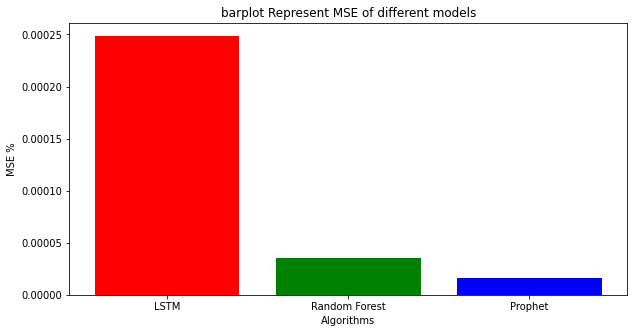

In [64]:
colors = ['red','green','blue']
plt.figure(figsize=(10,5))
plt.title("barplot Represent MSE of different models")
plt.ylabel("MSE %")
plt.xlabel("Algorithms")
plt.bar(model_ev_mse['Model'],model_ev_mse['MSE'], color = colors)
plt.show()

In [65]:
model_ev_mae = pd.DataFrame({'Model': ['LSTM','Random Forest','Prophet'], 'MAE': [lstm_mean_absolute_error,
                    rf_mean_absolute_error, prophet_mean_absolute_error]})
model_ev_mae

,Model,MAE
0,LSTM,0.003668
1,Random Forest,0.000776
2,Prophet,0.000739


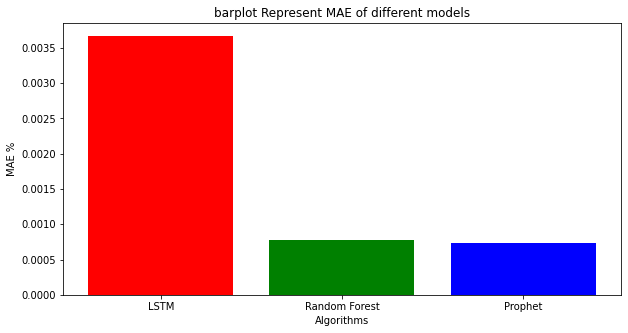

In [66]:
colors = ['red','green','blue']
plt.figure(figsize=(10,5))
plt.title("barplot Represent MAE of different models")
plt.ylabel("MAE %")
plt.xlabel("Algorithms")
plt.bar(model_ev_mae['Model'],model_ev_mae['MAE'], color = colors)
plt.show()

In [67]:
model_ev_r2 = pd.DataFrame({'Model': ['LSTM','Random Forest','Prophet'], 'r2_score': [lstm_r2_score,
                    rf_r2_score,prophet_r2_score]})
model_ev_r2

,Model,r2_score
0,LSTM,0.964529
1,Random Forest,0.985659
2,Prophet,0.997135


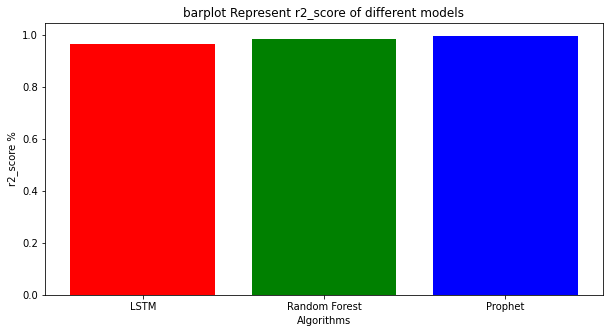

In [68]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(10,5))
plt.title("barplot Represent r2_score of different models")
plt.ylabel("r2_score %")
plt.xlabel("Algorithms")
plt.bar(model_ev_r2['Model'],model_ev_r2['r2_score'], color = colors)
plt.show()

Observation:

1.   All three models’ r2 score is closer to 1.0, which presents the model fits the data well.
2.   Among all three models, Prophet performs the best in the model comparison (lower MSE and MAE with high r2 score).


# Tweets Data Analysis


## Tweets Data Cleaning

Let's analyze Elon Musk's tweets and see what are most frequent words he used.

In [69]:
# Clean tweets dataset for later analysis
def clean_tweets(df):
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ''))
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\xa0', ''))
    df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ''))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'https\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'pic.twitter\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'#\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'@\S+', '', x))
    df['tweet'] = df['tweet'].apply(lambda x: x.strip())
    df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.split()))
    df['tweet'] = df['tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    df['tweet'] = df['tweet'].apply(lambda x: x.lower())

    return df

In [70]:
tweets = tweets[["id", "date", "time", "username", 
                 "tweet", "replies_count", "retweets_count", "likes_count", "link"]]

# Create new features
tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[0])
tweets = clean_tweets(tweets)
tweets.head()  

,id,date,time,username,tweet,replies_count,retweets_count,likes_count,link,year
0,1381273474400800773,2021-04-11,18:50:33,elonmusk,for now costs are decreasing rapidly,640,444,15281,https://twitter.com/elonmusk/status/1381273474...,2021
1,1381273076709478403,2021-04-11,18:48:58,elonmusk,love this beautiful shot,2464,1517,71161,https://twitter.com/elonmusk/status/1381273076...,2021
2,1381258144916008964,2021-04-11,17:49:38,elonmusk,trust the shrub,115,48,1380,https://twitter.com/elonmusk/status/1381258144...,2021
3,1381221447322935303,2021-04-11,15:23:49,elonmusk,the art in cyberpunk is incredible,8437,10329,228144,https://twitter.com/elonmusk/status/1381221447...,2021
4,1381129584435818496,2021-04-11,09:18:47,elonmusk,🤣🤣,446,542,7489,https://twitter.com/elonmusk/status/1381129584...,2021


Let's take a look at Elon's tweets and get some insights from them!

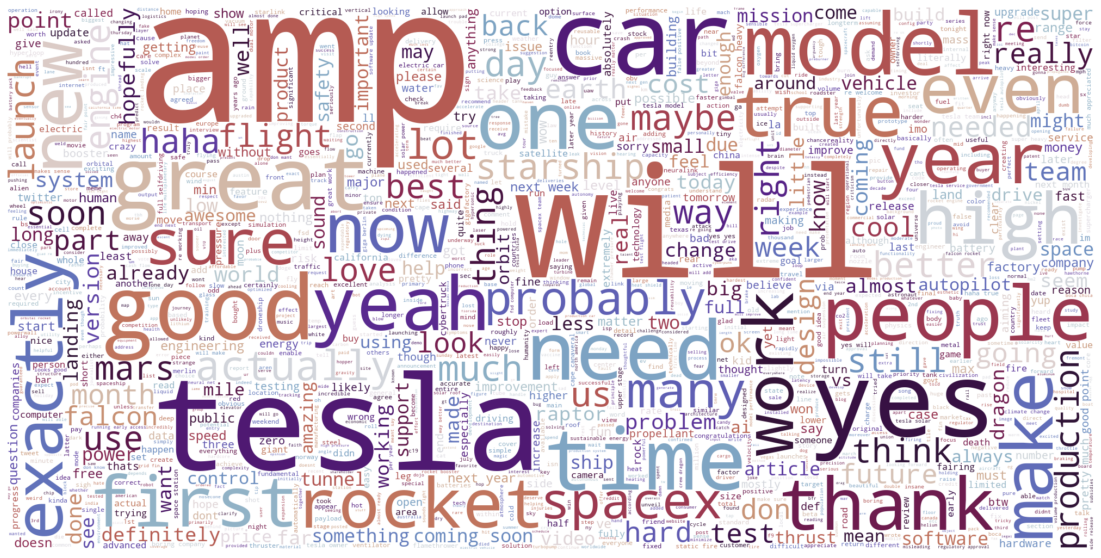

In [71]:
# Make wordcloud
all_tweets = " ".join(token for token in tweets["tweet"])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      max_words = 1500,
                      max_font_size = 350, random_state = 42,
                      width = 2000, height = 1000,
                      colormap = "twilight_shifted", 
                      background_color = 'white')
wordcloud.generate(all_tweets)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show();

## Any correlation between Dogecoin and Elon Musk's Tweets?

In this section, we tried to make the intersection of Dogecoin price and Elon Musk's tweets Date. The goal is to see whether those tweets did affect Dogecoin price. The green lines represent the timing when Elon Musk made tweets about "DOGECOIN"

The price here is in log scale in order to respond to skewness towards large values, letting us have a better understanding of the visualization.

We can easily see that the Price of Dogecoin soared after some of Elon Musk's tweets related to "DOGECOIN".

Most liked DOGECOIN tweets:
1. dogecoin is the people’s crypto
2. bought some dogecoin for lil x so he can be a toddler hodler
3. spacex is going to put a literal dogecoin on the literal moon
4. if major dogecoin holders sell most of their coins it will get my full support too much concentration is the only real issue imo
5. dogecoin rulz
6. origin of doge day afternoon the ancient romans sacrificed a dogecoin at the beginning of the doge days to appease the rage of sirius believing that the star was the cause of the hot sultry weather
7. dogecoin value may vary
----------------------------------
Tweets with 'dogecoin'
1. spacex is going to put a literal dogecoin on the literal moon
2. origin of doge day afternoon the ancient romans sacrificed a dogecoin at the beginning of the doge days to appease the rage of sirius believing that the star was the cause of the hot sultry weather
3. 2022 dogecoin is dumb
4. if major dogecoin holders sell most of their coins it will get my full support 

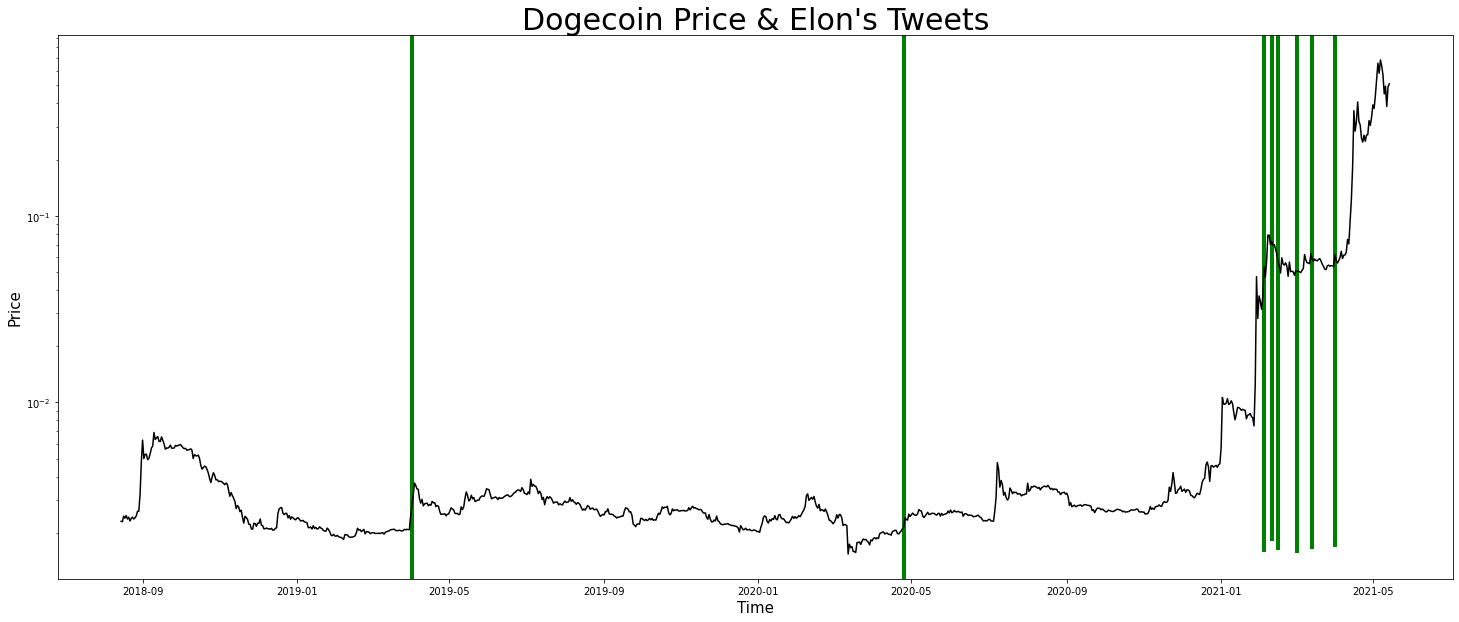

In [72]:
dogecoin_tweets = tweets[tweets["tweet"].str.contains("dogecoin")].reset_index(drop = True)
top = dogecoin_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("Most liked DOGECOIN tweets:")
for i, text in enumerate(top):
  print(f"{i+1}. {text}")

print('----------------------------------')
dc_tweets = tweets[tweets["tweet"].str.contains("dogecoin")].reset_index(drop = True)

# Convert date to number
dc_tweets["date"] = dc_tweets["date"].apply(lambda x: datetime.fromisoformat(x))
timestamps = dc_tweets["date"]
dc_prices = data.sort_values("Date", ascending=False).head(1000)
dc_prices["Date"] = dc_prices["Date"].apply(lambda x: datetime.fromisoformat(x))
print("Tweets with 'dogecoin'")
for i, tweet in enumerate(dc_tweets["tweet"]): 
  print(f"{i+1}.", tweet)

# Let's plot the correlation out!
x_values = dc_prices[dc_prices["Date"].isin(timestamps)]["Date"]
y_values = dc_prices[dc_prices["Date"].isin(timestamps)]["Close"]

plt.figure(figsize = (25, 10))
for x, y in zip(x_values, y_values):
    plt.axvline(x, y, color = "Green", linewidth=4)

plt.plot(dc_prices["Date"], dc_prices["Close"], color="black")
plt.title("Dogecoin Price & Elon's Tweets", size = 30)
plt.xlabel("Time", size = 15)
plt.ylabel("Price", size = 15)
plt.yscale("log")

Observation: 

*   As Elon Musk tweets go, so goes the crypto market, sending the price of bitcoin — as well as dogecoin — up and down with fewer than 280 characters.

*   Musk’s tweets can greatly affect investors in cryptocurrency. The SpaceX CEO also sent dogecoin prices up 30 percent after tweeting that he was working with dogecoin developers to improve its efficiency.

*   If Elon Musk manages to bring changes to Dogecoin to make transactions faster and fees lower, Dogecoin will most likely shoot up in value. Making crypto price predictions can be difficult, especially given the fluctuating price of Dogecoin. However, we believe that there’s an opportunity that dogecoin can reach the price of $1 in a few years.

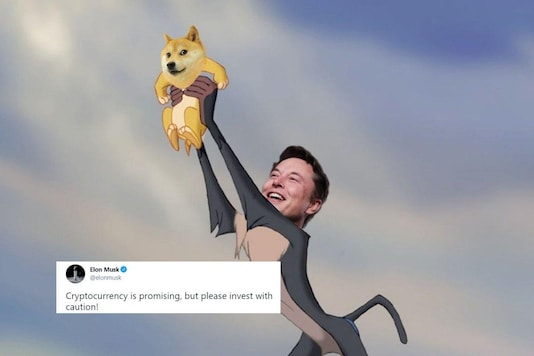